# Análisis exploratorio en base a la metodología CRISP DM

## Paso 1 Comprensión del Negocio

### Contexto del Proyecto

En este proyecto, el objetivo principal es explorar cómo el clima puede influir en las actividades turísticas. Esto se refiere a cómo las condiciones meteorológicas, como la temperatura, la humedad, la precipitación, entre otros, afectan la experiencia de los visitantes y las decisiones de los operadores turísticos. En particular, la variable de interés es la predicción de si lloverá o no al día siguiente, lo cual puede ser crucial para el turismo en términos de planificación de actividades al aire libre, excursiones, traslados o programación de eventos.

### Objetivos del Análisis

- Explorar el conjunto de datos y realizar un Análisis Exploratorio de Datos para comprender las variables disponibles y su distribución.
- Desarrollar un modelo predictivo que permita prever si lloverá al día siguiente basándose en los datos actuales de clima.
- Identificar las variables más relevantes para la predicción de lluvia, para poder centrarse en las más importantes y descartar aquellas que no aporten valor al modelo.


### KPI del proyecto

**Para evaluar el impacto y la utilidad de este análisis, se definen los siguientes indicadores clave de desempeño (KPIs)**:

- Precisión del modelo de predicción de lluvia (% de aciertos en la clasificación de "Lloverá mañana").
- Reducción en cancelaciones o reprogramaciones de actividades turísticas (% de disminución de imprevistos climáticos evitables gracias a predicciones acertadas).
- Impacto en la satisfacción del turista (mejora en la planificación y experiencia gracias a una gestión climática más informada).

### Impacto esperado

- El análisis de datos y los modelos predictivos podrían ayudar a operadores turísticos y autoridades locales a optimizar la planificación de itinerarios, excursiones y actividades culturales o recreativas según las condiciones climáticas previstas.

- También podría apoyar en la toma de decisiones estratégicas, como cuándo realizar eventos masivos, reforzar rutas bajo techo o implementar sistemas de alerta para actividades sensibles a la lluvia.

## Paso 2 Comprensión de los datos

### 2.1 Estadísticas descriptivas

In [10]:
import pandas as pd

# Path to the file inside the container
file_path = '/home/kedro_docker/data/01_raw/weatherAUS.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [11]:
# Mostrar las primeras filas del conjunto de datos
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [12]:
# Obtener información general sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [13]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [14]:
# Verificar los valores faltantes
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [15]:
# Cuantos registros hay por locación

df['Location'].value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

### 2.2 Visualizaciones

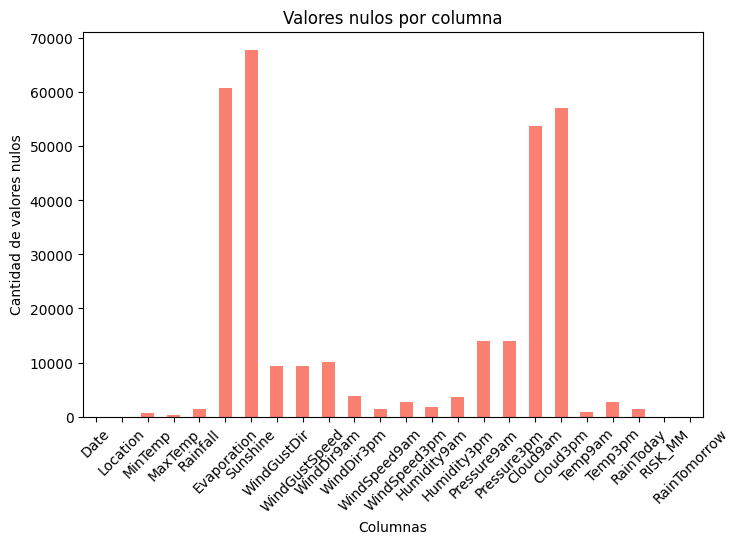

In [17]:
# Visualización de valores nulos
import matplotlib.pyplot as plt
cantidad_nulos = df.isnull().sum()

plt.figure(figsize=(8, 5))
cantidad_nulos.plot(kind='bar', color='salmon')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.title('Valores nulos por columna')
plt.xticks(rotation=45)
plt.show()

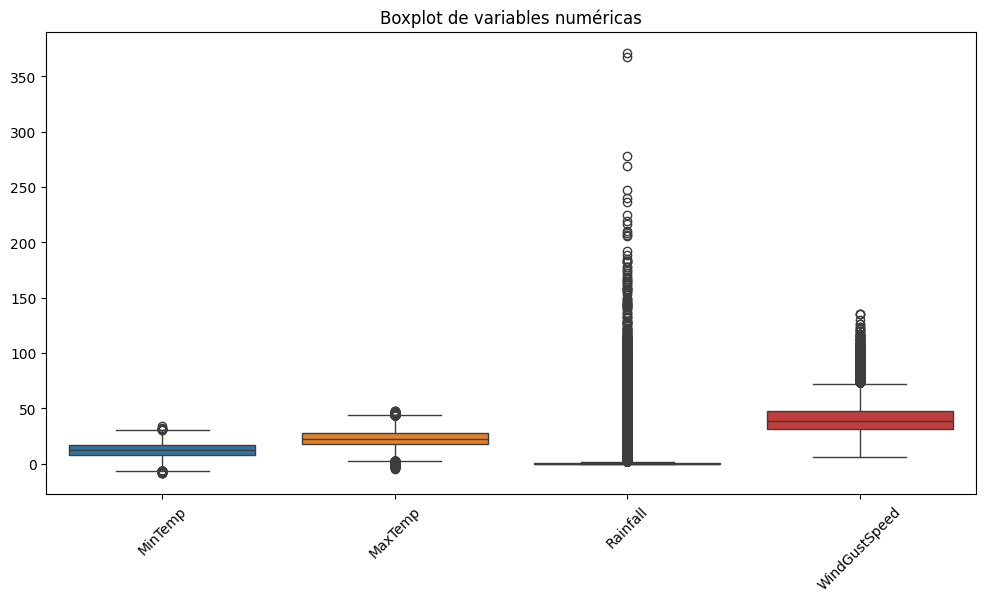

In [18]:
# Visualización de Outliers
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']])
plt.title("Boxplot de variables numéricas")
plt.xticks(rotation=45)
plt.show()

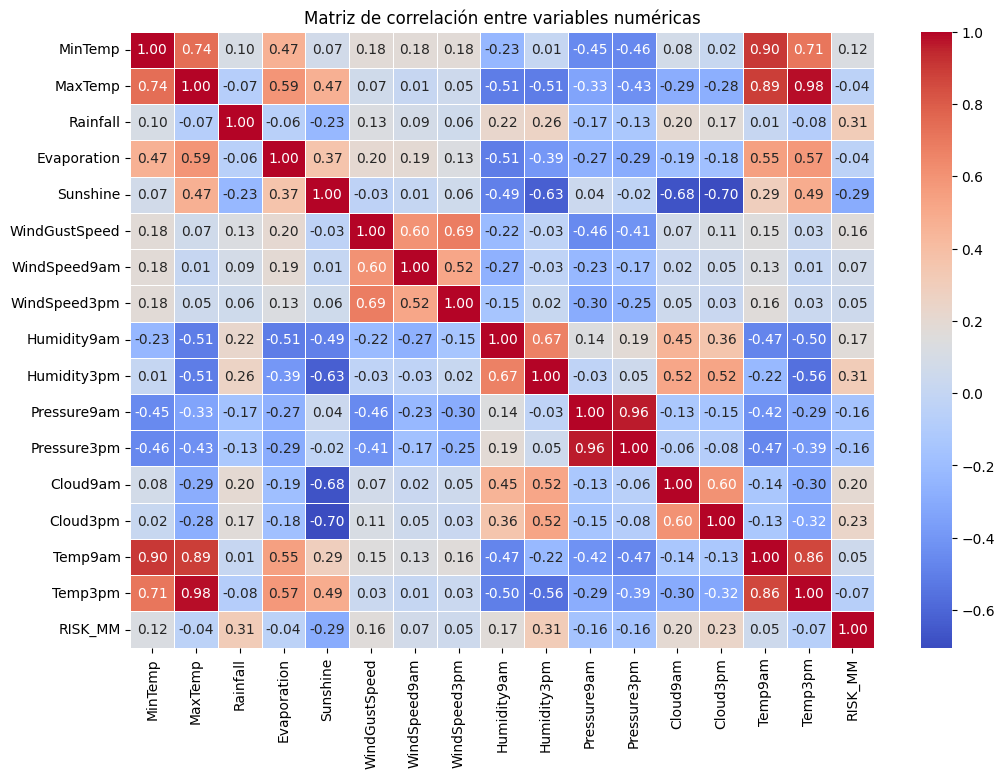

In [19]:
# Crear una copia del DataFrame original para trabajar sin modificarlo
df_temp = df.copy()

# Convertir "Date" a tipo datetime en la copia
df_temp["Date"] = pd.to_datetime(df_temp["Date"])

# Seleccionar solo las columnas numéricas en una nueva variable
df_numeric = df_temp.select_dtypes(include=["number"])

# Guardar la matriz de correlación en una variable
correlation_matrix = df_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

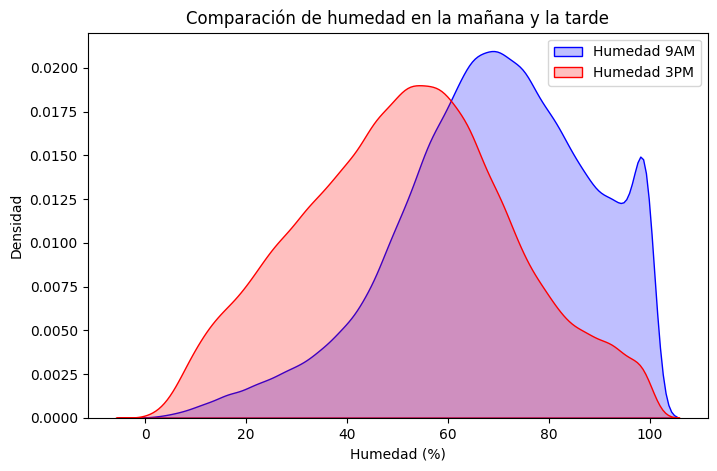

In [20]:
# Comparación de humedad en la mañana y en la tarde
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Humidity9am"].dropna(), label="Humedad 9AM", fill=True, color="blue")
sns.kdeplot(df["Humidity3pm"].dropna(), label="Humedad 3PM", fill=True, color="red")
plt.xlabel("Humedad (%)")
plt.ylabel("Densidad")
plt.title("Comparación de humedad en la mañana y la tarde")
plt.legend()
plt.show()

Valor de correlación | Interpretación
- 1.0	Correlación positiva perfecta: si una variable sube, la otra también sube proporcionalmente.
- 0.7 a 0.9	Correlación fuerte: las variables están fuertemente relacionadas.
- 0.4 a 0.6	Correlación moderada: hay relación, pero no es tan fuerte.
- 0.1 a 0.3	Correlación débil: la relación es baja.
- 0.0	Sin correlación: las variables no tienen relación.
- -0.1 a -0.3	Correlación débil negativa: cuando una sube, la otra baja.
- -0.4 a -0.6	Correlación moderada negativa.
- -0.7 a -0.9	Correlación fuerte negativa.
- -1.0	Correlación negativa perfecta: si una sube, la otra baja proporcionalmente.

## Paso 3: Preparación de los Datos (Data Preparation)

En esta fase, nos enfocamos en:
- Limpiar los datos
- Convertir tipos de datos si es necesario y transformar los datos a un formato que sea adecuado para el análisis o modelado posterior.
- Manejo de valores nulos: Dependiendo de la cantidad de valores faltantes, podemos decidir eliminar las filas/columnas con muchos valores nulos o imputar esos valores.

In [21]:
# Eliminar filas con valores nulos en una columna específica, por ejemplo 'RainTomorrow'
df = df.dropna(subset=['RainTomorrow'])

#Incluir solo valores válidos en Cloud3pm
df = df[df["Cloud3pm"].between(0, 8)]

# O imputar valores nulos con la media o mediana para las columnas numéricas
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

# O si hay muchas columnas con valores nulos, podemos eliminar todas las filas con valores nulos
df = df.dropna()

In [22]:
# Asegurarse de que las columnas categóricas estén correctamente tipadas como 'object' o 'category'
df['Location'] = df['Location'].astype('category')

# Convierte variables de fecha a tipo datetime si es necesario
df['Date'] = pd.to_datetime(df['Date'])

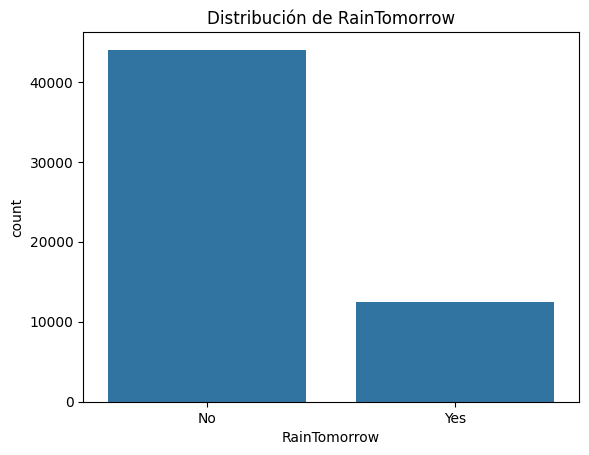

In [23]:
# Ver distribución de la variable objetivo 'RainTomorrow'
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribución de RainTomorrow')
plt.show()

Aquí visualizamos cómo se distribuye la variable objetivo (por ejemplo, si llovió o no al día siguiente). Esto es importante porque si la variable está desbalanceada (por ejemplo, muchos más valores de "No lluvia"), podría afectar el modelo.


### 3.2 Visualizaciones post limpieza con interés de negocio

3.2.1 Gráficos para variables nominales

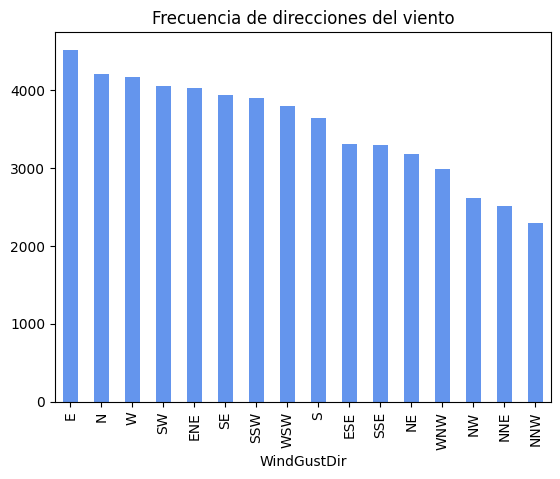

In [24]:
# Frecuencia de direcciones del viento (WindGustDir)

import seaborn as sns
import matplotlib.pyplot as plt
df["WindGustDir"].value_counts().plot(
    kind="bar", color="cornflowerblue", title="Frecuencia de direcciones del viento");

**Este gráfico me permite identificar cuáles son las direcciones del viento más frecuentes en las distintas regiones. Para el turismo, esta información es valiosa ya que ciertas direcciones pueden estar asociadas a cambios bruscos en el clima, afectando actividades al aire libre, como excursiones o tours costeros. También puede influir en la percepción de confort del visitante según el viento predominante.**

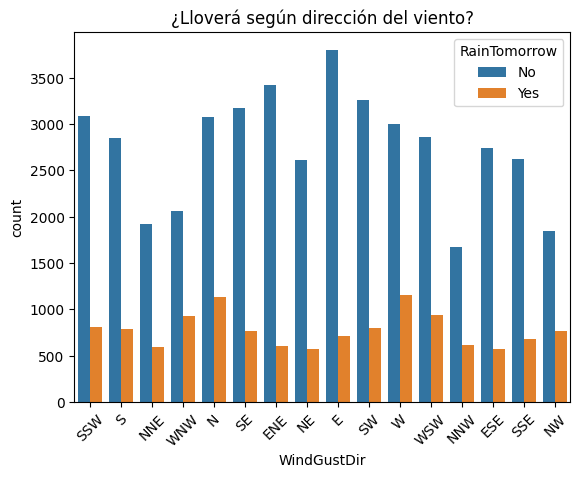

In [25]:
# Días con lluvia por dirección de viento

sns.countplot(data=df, x="WindGustDir", hue="RainTomorrow")
plt.title("¿Lloverá según dirección del viento?")
plt.xticks(rotation=45);


**Esta visualización me ayuda a detectar si ciertas direcciones del viento están directamente asociadas a una mayor probabilidad de lluvia. Esta relación es especialmente útil en el turismo porque permite anticipar condiciones climáticas desfavorables en función del viento. Por ejemplo, si un tipo de viento suele preceder la lluvia, se pueden ajustar los itinerarios o advertir a los visitantes.**

Text(0.5, 1.0, 'Relación entre: si llovió hoy y si lloverá mañana')

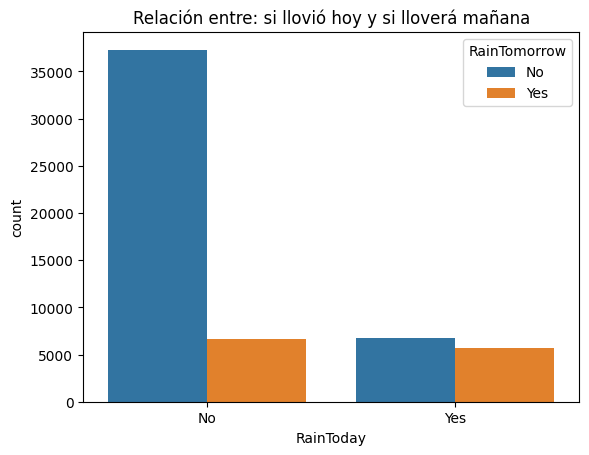

In [26]:
# Porcentaje de días con lluvia por categoría RainToday
sns.countplot(data=df, x="RainToday", hue="RainTomorrow")
plt.title("Relación entre: si llovió hoy y si lloverá mañana")

**Este gráfico me permite ver si existe una tendencia de continuidad entre días lluviosos. Para el turismo, entender esto es esencial porque si hoy llueve y es probable que mañana también, puedo reorganizar actividades bajo techo, prevenir cancelaciones o adecuar la logística de transporte y alojamiento. También ayuda a gestionar expectativas de los turistas sobre la duración del mal tiempo.**

3.2.2 Gráficos para las variables Ordinales

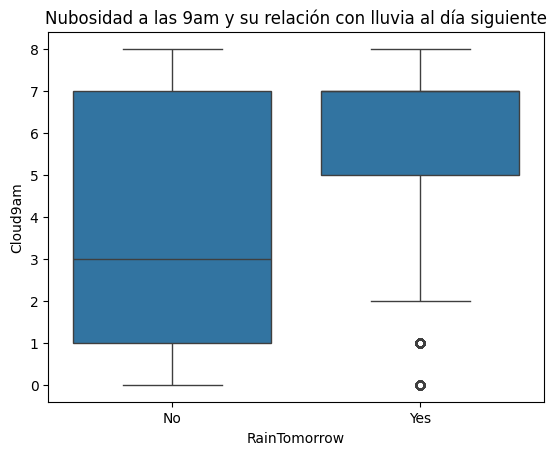

In [27]:
sns.boxplot(x="RainTomorrow", y="Cloud9am", data=df)
plt.title("Nubosidad a las 9am y su relación con lluvia al día siguiente");

**Este gráfico me muestra cómo la cantidad de nubes observadas por la mañana puede estar asociada a lluvia al día siguiente. Desde el punto de vista del turismo, es muy útil para planificación diaria de actividades. Por ejemplo, si se observa un cielo muy nublado a las 9am, puedo anticipar la necesidad de modificar rutas turísticas, programar actividades bajo techo o advertir a los guías turísticos.**

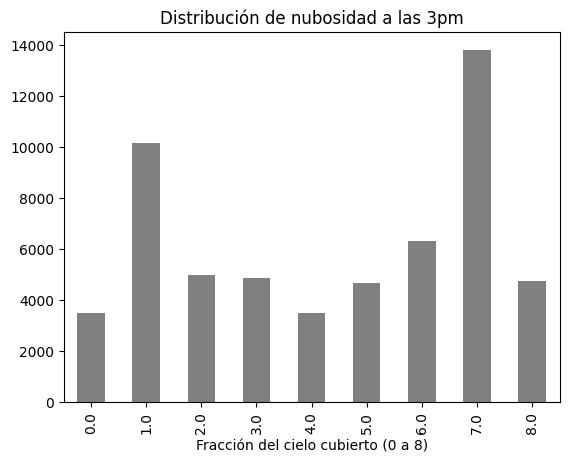

In [28]:
df["Cloud3pm"].value_counts().sort_index().plot(kind="bar", color="gray")
plt.title("Distribución de nubosidad a las 3pm")
plt.xlabel("Fracción del cielo cubierto (0 a 8)");

**Con esta visualización puedo ver con qué frecuencia hay nubosidad en las tardes, que es un horario clave para actividades turísticas. Si hay alta nubosidad de forma constante a esa hora, puede impactar en tours fotográficos, visitas a miradores o excursiones que dependen de buena visibilidad. Este dato es relevante para ajustar ofertas turísticas según la experiencia que el clima realmente permite.**

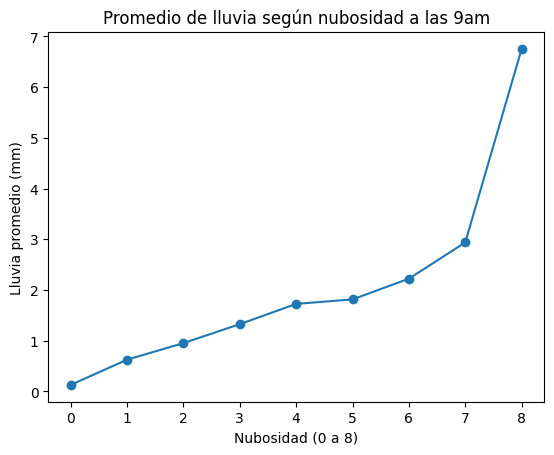

In [29]:
df.groupby("Cloud9am")["Rainfall"].mean().plot(kind="line", marker="o")
plt.title("Promedio de lluvia según nubosidad a las 9am")
plt.xlabel("Nubosidad (0 a 8)")
plt.ylabel("Lluvia promedio (mm)");

**Este gráfico conecta dos variables clave: nubosidad matinal y volumen de lluvia. Es fundamental para el turismo porque permite hacer predicciones sencillas para el equipo de logística o atención a turistas. Si una mañana presenta alta nubosidad y esto históricamente conlleva lluvias más intensas, puedo ajustar mis decisiones rápidamente incluso sin modelos predictivos complejos.**

## PASO 4: Modelado de Datos

In [30]:
import pandas as pd

df = pd.read_csv("/home/kedro_docker/data/01_raw/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Imputar los datos y transformarlos previo a ingreso al modelo

In [31]:
from sklearn.impute import SimpleImputer

# Eliminar columnas con más del 30% de valores nulos
threshold = 0.3
df = df.loc[:, df.isnull().mean() < threshold]

# Imputación
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

df[num_cols] = SimpleImputer(strategy="mean").fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])

# Convertir variable objetivo
df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})
df = df.dropna(subset=["RainTomorrow"])

#Convertimos variables de texto a numéricas para modelado
df = pd.get_dummies(df, drop_first = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Columns: 3543 entries, MinTemp to RainToday_Yes
dtypes: bool(3529), float64(13), int64(1)
memory usage: 493.7 MB


### División de datos en entrenamiento y prueba 

## PASO 5: Entrenamiento de modelos

Modelos de Regresión 

Modelo de Clasificación